Для выполнения задания используйте датасет Mortality and Water Hardness: доступен [по ссылке](https://www.kaggle.com/datasets/ukveteran/mortality-and-water-hardness).

В этом датасете содержатся данные по средней годовой смертности на 100 000 населения и концентрации кальция в питьевой воде для 61 большого города Англии и Уэльса. Города дополнительно поделены на северные и южные.

In [15]:
import pandas as pd

df = pd.read_csv("water.csv")
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


# Задание 1
Ответьте на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью? Для ответа выполните следующие шаги:

1. Постройте точечный график.
2. Рассчитайте коэффициенты корреляции Пирсона и Спирмена.
3. Постройте модель линейной регрессии.
4. Рассчитайте коэффициент детерминации.
5. Выведите график остатков.

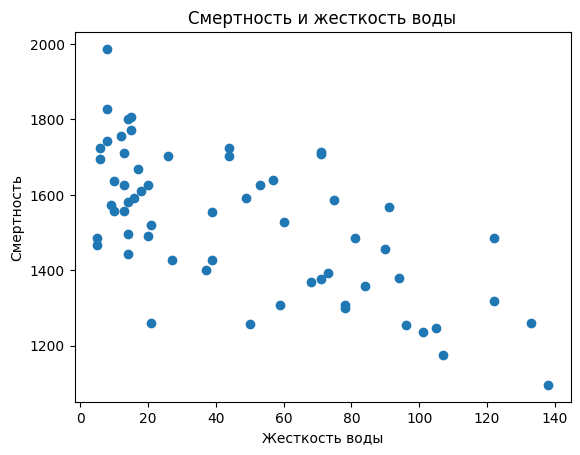

In [ ]:
# 1. Постройте точечный график.

import matplotlib.pyplot as plt

def scatter_plot(df):
    """
    Постройте точечный график

    Аргрументы:
    - df (pf.DataFrame)

    Возвращает None:
        отображает график
    """
    plt.scatter(df["hardness"], df["mortality"])
    plt.xlabel("Жесткость воды")
    plt.ylabel("Смертность")
    plt.title("Смертность и жесткость воды")
    plt.show()

scatter_plot(df)

In [ ]:
# 2. Рассчитайте коэффициенты корреляции Пирсона и Спирмена.


from scipy.stats import pearsonr, spearmanr

def pearson_corr(x, y):
    """
    Коэффициент корреляции Пирсона

    Аргументы:
        x (pd.Series): первая переменная
        y (pd.Series): вторая переменная

    Возвращает float:
        значение коэффициента корреляции Пирсона
    """
    coef, _ = pearsonr(x, y)
    return coef


def spearman_corr(x, y):
    """
    Коэффициент корреляции Спирмена

    Аргументы:
        x (pd.Series): первая переменная
        y (pd.Series): вторая переменная

    Возвращает float:
        значение коэффициента корреляции Спирмена
    """
    coef, _ = spearmanr(x, y)
    return coef

pearson = pearson_corr(df["hardness"], df["mortality"])
spearman = spearman_corr(df["hardness"], df["mortality"])

print("Коэффициент Пирсона:", pearson)
print("Коэффициент Спирмена:", spearman)

Коэффициент Пирсона: -0.6548486232042465
Коэффициент Спирмена: -0.6316646189166502


Intercept (b): 1676.3556007011587
Coefficient (k): -3.226091606244152


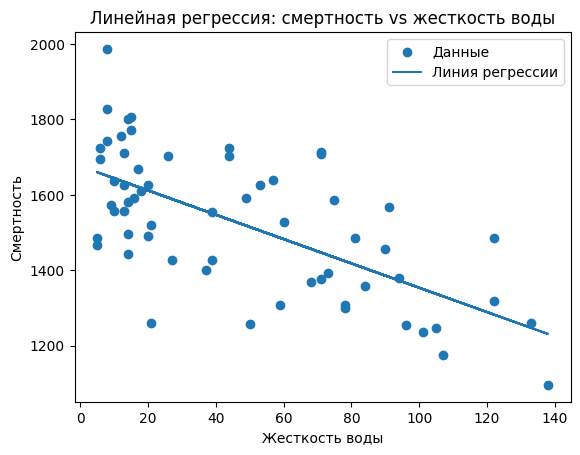

In [ ]:
# 3. Постройте модель линейной регрессии.


from sklearn.linear_model import LinearRegression

# --- Функции ---

def build_linear_regression(x, y):
    """
    Построение модели линейной регрессии

    Аргументы:
        x (pd.Series): признак (жесткость воды)
        y (pd.Series): целевая переменная (смертность)

    Возвращает LinearRegression:
        модель линейной регрессии
    """
    X = x.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    return model


def print_model_params(model):
    """
    Вывод параметров модели

    Аргументы:
        model (LinearRegression): обученная модель

    Возвращает None:
        выводит коэффициенты модели
    """
    print("Intercept (b):", model.intercept_)
    print("Coefficient (k):", model.coef_[0])


def plot_regression_line(x, y, model):
    """
    Построение графика с линией линейной регрессии

    Аргументы:
        x (pd.Series): признак
        y (pd.Series): целевая переменная
        model (LinearRegression): модель

    Возвращает None:
        отображает график
    """
    plt.scatter(x, y, label="Данные")
    predicted = model.predict(x.values.reshape(-1, 1))
    plt.plot(x, predicted, label="Линия регрессии")
    plt.xlabel("Жесткость воды")
    plt.ylabel("Смертность")
    plt.title("Линейная регрессия: смертность vs жесткость воды")
    plt.legend()
    plt.show()


# --- Вызов функций ---

model = build_linear_regression(df["hardness"], df["mortality"])
print_model_params(model)
plot_regression_line(df["hardness"], df["mortality"], model)

In [ ]:
# 4. Рассчитайте коэффициент детерминации.


import numpy as np

def determination_coefficient(y_true, y_pred):
    """
    Коэффициент детерминации (R^2)

    Аргументы:
        y_true (pd.Series | np.ndarray): истинные значения
        y_pred (pd.Series | np.ndarray): предсказанные моделью значения

    Возвращает float:
        коэффициент детерминации R^2
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    ss_res = np.sum((y_true - y_pred) ** 2)   # сумма квадратов ошибок
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # общая сумма квадратов

    r2 = 1 - ss_res / ss_tot
    return r2

# 1. Получаем предсказанные значения
y_pred = model.predict(df["hardness"].values.reshape(-1, 1))

# 2. Рассчитываем R^2 через нашу функцию
r2 = determination_coefficient(df["mortality"], y_pred)

print("Коэффициент детерминации (R^2):", r2)


Коэффициент детерминации (R^2): 0.4288267193124974


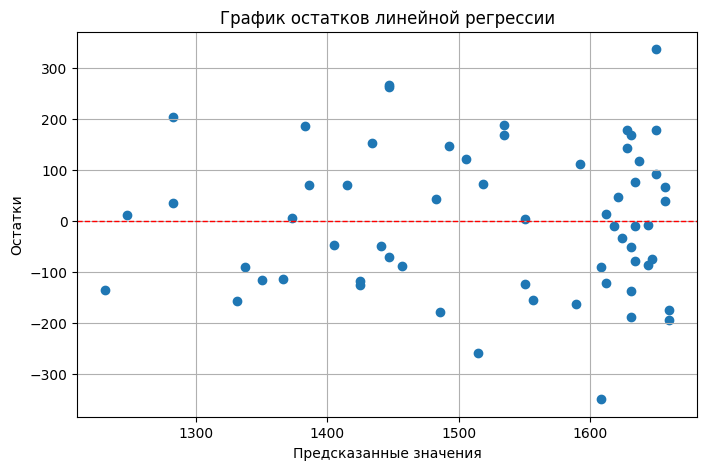

In [ ]:
# 5. Выведите график остатков.

def plot_residuals(y_true, y_pred):
    """
    График остатков линейной модели

    Аргументы:
        y_true (pd.Series | np.ndarray): истинные значения
        y_pred (pd.Series | np.ndarray): предсказанные моделью значения

    Возвращает None:
        отображает график остатков
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    residuals = y_true - y_pred  # остатки

    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color="red", linestyle="--", linewidth=1)
    plt.xlabel("Предсказанные значения")
    plt.ylabel("Остатки")
    plt.title("График остатков линейной регрессии")
    plt.grid(True)
    plt.show()

# Предсказанные значения
y_pred = model.predict(df["hardness"].values.reshape(-1, 1))

# Построение графика остатков
plot_residuals(df["mortality"], y_pred)

# Задание 2

Ответьте на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? Для ответ выполните следующие шаги:

1. Разделите данные на 2 группы.
2. Повторите аналогичные шаги из пункта 1 для каждой группы по отдельности.